## Lesson-01

In [58]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [ ]:
another_grammar = """
# 
"""

In [2]:
import random

In [29]:
#按|这条线把字符串分割成列表，random.choice随机从该列表选择一项
#后面那个split把文字前后空格去掉，切片为0取出字符串
def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [26]:
c=' lll'
c.split()

['lll']

In [25]:
random.choice(['蓝色的 ', ' 好看的 ', ' 小小的'])

' 好看的 '

In [8]:
'蓝色的 | 好看的 | 小小的'.split('|')

['蓝色的 ', ' 好看的 ', ' 小小的']

In [40]:
#lambda代表函数，choice调用里面的函数之一，函数要想输出值须在后面加括号()
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [33]:
adj_star()

'好看的好看的小小的'

In [39]:
c = lambda : ''
c()

''

## But the question is ? 

如果我们更换了语法，会发现所有写过的程序，都要重新写。:( 

In [53]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [48]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    #为一个语法树创建空字典
    grammar = {}
    #对一个已经定义好的语法进行操作，例如host,human
    #先将每一行分开
    for line in grammar_str.split(line_split):
        #如果某一行是空值，则继续
        if not line.strip(): continue
        #按‘=>’这个符号把表达式和内容划分开
        exp, stmt = line.split(split)
        #把表达式和内容传入字典中
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [46]:
x = []
if not x: print('a')

a


In [55]:
create_grammar(adj_grammar)['Adj*']

[['null'], ['Adj', 'Adj*']]

In [240]:
choice = random.choice

def generate(gram, target):
    #设置递归终止条件，如果目标不在对应的key这列中则直接返回value
    if target not in gram: return target # means target is a terminal expression
    #注意choice返回的是列表中套着的列表！这个套着的列表可以对每个值递归下去
    expaned = [generate(gram, t) for t in choice(gram[target])]
    #把expanded列表中的字符串连接起来，后面是排除Null值
    #/n相当于一个换行的条件，如果出现则换行('\n')
    #这个换行是专门针对后面写的programming语句设置的条件
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [96]:
c = [1,2,3]
b =[e if e != 1 else '\n' for e in c if e != 2]
b

['\n', 3]

In [78]:
example_grammar = create_grammar(simple_grammar)

In [60]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [90]:
generate(gram=example_grammar, target='sentence')

['这个']
['null']
['篮球']
['这个', '', '篮球']
['看着']
['一个']
['小小的']
['null']
['小小的', '']
['女人']
['一个', '小小的', '女人']
['看着', '一个小小的女人']
['这个篮球', '看着一个小小的女人']


'这个篮球看着一个小小的女人'

In [81]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [84]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

你好我是8号,请问你要打牌吗？
你好我是7号,您需要赌博吗？
您好我是3号,您需要赌博吗？
先生,你好我是8号,请问你要打猎吗？
您好我是22344号,请问你要赌博吗？
先生,您好我是3号,您需要打牌吗？
您好我是9号,您需要赌博吗？
女士,你好我是5号,您需要打牌吗？
女士,你好我是81116号,请问你要打牌吗？
先生,您好我是316号,您需要打猎吗？
先生,您好我是8号,请问你要打牌吗？
先生,您好我是81号,请问你要赌博吗？
先生,你好我是9号,您需要赌博吗？
你好我是4号,您需要喝酒吗？
小朋友,您好我是3号,请问你要打牌吗？
先生,你好我是1号,您需要喝酒吗？
小朋友,您好我是6号,您需要喝酒吗？
你好我是633号,您需要打猎吗？
女士,您好我是9号,请问你要喝酒吗？
您好我是6号,请问你要打猎吗？


希望能够生成最合理的一句话？ 

## Data Driven

我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [45]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [48]:
print(generate(gram=create_grammar(programming, split='=>'), target='stmt'))

while(infoinfo3){
....while(namecourse1){
....databasecourse3=student3}}


# Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w_2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

$ Pr(w_1) $

In [272]:
import random

In [97]:
random.choice(range(100))

52

In [98]:
filename = 'article_9k.txt'

In [99]:
import pandas as pd

In [117]:
content = pd.read_csv(filename,names='c')

In [118]:
content.head()

,c
0,此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定...
1,骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能...
2,此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可...
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车新华社记者张立云摄
4,原标题44岁女子跑深圳约会网友被拒暴雨中裸身奔走深圳交警微博称昨日清晨交警发现有一女子赤裸上...


In [121]:
#convert a series to list
articles = content['c'].tolist()

In [122]:
len(articles)

89609

invalid

In [123]:
import re

In [124]:
def token(string):
    # we will learn the regular expression next course.
    # 把字符全部取出来，不要标点
    return re.findall('\w+', string)

In [125]:
from collections import Counter

In [30]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

In [32]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [126]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [134]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [136]:
articles_clean[1]

'骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台'

In [137]:
len(articles_clean)

89609

In [169]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

UnicodeEncodeError: 'charmap' codec can't encode characters in position 0-4: character maps to <undefined>

In [168]:
!ls

article_9k.txt
Assignment-01.ipynb
assignment-01-optional-pattern-match.ipynb
Computer Machinery and Intelligence.pdf
Lesson-01.ipynb
lesson01-for-2019-summer.pdf


In [147]:
import jieba

In [173]:
def cut(string): 
    return list(jieba.cut(string))

In [204]:
token_ = []
for i, line in enumerate(articles_clean):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 1000: break 
    token_ += cut(line)

0
100
200
300
400
500
600
700
800
900
1000


In [205]:
token_

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小',
 '核心',
 '相反',
 '他们',
 '正',
 '联手',
 '微软',
 '找到',
 '一种',
 '适合',
 '桌面',
 '平台',
 '的',
 '兼顾',
 '性能',
 '和',
 '功耗',
 '的',
 '完美',
 '方案',
 '报道',
 '称',
 '微软',
 '已经',
 '拿到',
 '了',
 '一些',
 '新',
 '的',
 '源码',
 '以便',
 'Windows10',
 '更好',
 '地',
 '理解',
 'biglittle',
 '架构',
 '资料',
 '显示',
 '骁龙',
 '835',
 '作为',
 '一款',
 '集

In [170]:
for i, line in enumerate((open('article_9k.txt'))):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 10000: break    
    TOKEN += cut(line)

In [171]:
TOKEN

[]

In [15]:
from functools import reduce

In [16]:
from operator import add, mul

In [49]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [ ]:
[1, 2, 3] + [3, 43, 5]

In [206]:
from collections import Counter

In [207]:
words_count = Counter(token_)

In [159]:
words_count = Counter(TOKEN)

In [208]:
words_count.most_common(100)

[('的', 23751),
 ('在', 6161),
 ('了', 5477),
 ('是', 3993),
 ('和', 3471),
 ('也', 2085),
 ('有', 2002),
 ('月', 1999),
 ('将', 1746),
 ('他', 1619),
 ('年', 1611),
 ('对', 1443),
 ('等', 1423),
 ('都', 1417),
 ('为', 1387),
 ('日', 1351),
 ('中', 1332),
 ('不', 1314),
 ('上', 1307),
 ('与', 1281),
 ('就', 1277),
 ('我', 1261),
 ('被', 1249),
 ('中国', 1236),
 ('6', 1230),
 ('到', 1172),
 ('人', 1094),
 ('这', 1069),
 ('但', 1051),
 ('一个', 984),
 ('后', 953),
 ('从', 951),
 ('还', 919),
 ('说', 911),
 ('并', 899),
 ('我们', 895),
 ('会', 843),
 ('而', 806),
 ('没有', 791),
 ('市场', 767),
 ('表示', 730),
 ('记者', 724),
 ('让', 717),
 ('进行', 685),
 ('要', 683),
 ('已经', 672),
 ('可以', 670),
 ('自己', 670),
 ('个', 657),
 ('他们', 645),
 ('时', 625),
 ('以', 622),
 ('发展', 620),
 ('下', 616),
 ('公司', 606),
 ('更', 567),
 ('5', 561),
 ('着', 557),
 ('你', 555),
 ('这个', 546),
 ('就是', 533),
 ('多', 521),
 ('能', 511),
 ('其', 507),
 ('目前', 505),
 ('可能', 504),
 ('企业', 485),
 ('3', 483),
 ('旅游', 483),
 ('通过', 481),
 ('她', 477),
 ('给', 472),
 ('时间', 471),

In [209]:
frequiences = [f for w, f in words_count.most_common(100)]

In [210]:
x = [i for i in range(100)]

In [211]:
%matplotlib inline

In [212]:
import matplotlib.pyplot as plt

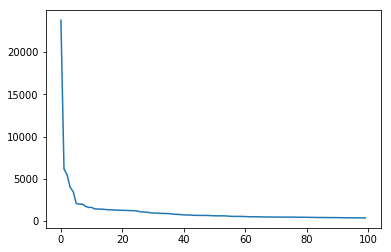

In [213]:
plt.plot(x, frequiences)

In [214]:
import numpy as np

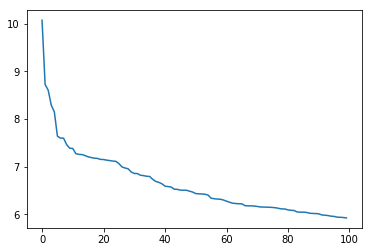

In [215]:
plt.plot(x, np.log(frequiences))

In [217]:
def prob_1(word):
    return words_count[word] / len(token_)

In [218]:
prob_1('我们')

0.002031735942430365

In [219]:
token_[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [220]:
token_ = [str(t) for t in token_]

In [221]:
token_

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小',
 '核心',
 '相反',
 '他们',
 '正',
 '联手',
 '微软',
 '找到',
 '一种',
 '适合',
 '桌面',
 '平台',
 '的',
 '兼顾',
 '性能',
 '和',
 '功耗',
 '的',
 '完美',
 '方案',
 '报道',
 '称',
 '微软',
 '已经',
 '拿到',
 '了',
 '一些',
 '新',
 '的',
 '源码',
 '以便',
 'Windows10',
 '更好',
 '地',
 '理解',
 'biglittle',
 '架构',
 '资料',
 '显示',
 '骁龙',
 '835',
 '作为',
 '一款',
 '集

In [222]:
token_2_GRAM = [''.join(token_[i:i+2]) for i in range(len(token_[:-2]))]

In [223]:
token_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [225]:
words_count_2 = Counter(token_2_GRAM)

In [85]:
def prob_1(word): return words_count[word] / len(token_)

In [226]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(token_2_GRAM)
    else:
        return 1 / len(token_2_GRAM)

In [228]:
prob_2('我们', '的')

0.0002338209521733998

In [229]:
prob_2('在', '吃饭')

2.2701063317805805e-06

In [230]:
prob_2('去', '吃饭')

2.2701063317805805e-06

In [231]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [232]:
get_probablity('小明今天抽奖抽到一台苹果手机')

8.211612563902779e-34

In [233]:
get_probablity('小明今天抽奖抽到一架波音飞机')

1.3686020939837966e-34

In [237]:
get_probablity('我们的来一杯')

2.409937726587482e-15

In [238]:
get_probablity('养乐多绿来一杯')

5.1533827575902836e-12

In [241]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prob: {}'.format(sen, get_probablity(sen)))

sentence: 这个蓝色的好看的蓝色的好看的篮球看着一个小小的桌子 with Prob: 7.653729432796449e-73
sentence: 一个小猫听着一个好看的小猫 with Prob: 1.1184740205266799e-38
sentence: 一个篮球看见这个小小的桌子 with Prob: 6.028801712166142e-29
sentence: 这个女人看见一个女人 with Prob: 2.655735384622883e-23
sentence: 这个小小的蓝色的好看的好看的小猫坐在这个好看的小猫 with Prob: 1.1480594149194674e-72
sentence: 这个小小的桌子听着一个篮球 with Prob: 1.6423225127805558e-33
sentence: 一个桌子听着这个篮球 with Prob: 2.411520684866457e-28
sentence: 这个小小的小小的篮球听着这个好看的桌子 with Prob: 1.9213082440649576e-50
sentence: 这个女人听着这个好看的蓝色的蓝色的女人 with Prob: 3.960494710792167e-61
sentence: 这个女人看着这个女人 with Prob: 2.655735384622883e-23


In [242]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 7.269290016923483e-57
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 7.269290016923483e-57
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.8086405136498427e-28
---- 真是一只好看的小猫 with probility 7.967206153868651e-23
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.4038472193713484e-16
---- 今晚火锅去吃我 with probility 5.311470769245767e-23
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.1698726828094571e-17
---- 养乐多绿来一杯 with probility 5.1533827575902836e-12


## Data Driven